<a href="https://colab.research.google.com/github/Wassifoo/Data-Mining-Projects/blob/main/Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install kaggle

In [3]:
! pip install tensorflow

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
! kaggle datasets download aadityabansalcodes/telecommunications-industry-customer-churn-dataset

Dataset URL: https://www.kaggle.com/datasets/aadityabansalcodes/telecommunications-industry-customer-churn-dataset
License(s): other
100% 5.86M/5.86M [00:00<00:00, 60.9MB/s]
100% 5.86M/5.86M [00:00<00:00, 60.4MB/s]


In [8]:
! unzip  telecommunications-industry-customer-churn-dataset.zip

Archive:  telecommunications-industry-customer-churn-dataset.zip
  inflating: CustomerChurn.csv       
  inflating: CustomerChurn.xlsx      
  inflating: Telco_customer_churn.csv  
  inflating: Telco_customer_churn.xlsx  
  inflating: Telco_customer_churn_demographics.csv  
  inflating: Telco_customer_churn_demographics.xlsx  
  inflating: Telco_customer_churn_location.csv  
  inflating: Telco_customer_churn_location.xlsx  
  inflating: Telco_customer_churn_population.csv  
  inflating: Telco_customer_churn_population.xlsx  
  inflating: Telco_customer_churn_services.csv  
  inflating: Telco_customer_churn_services.xlsx  
  inflating: Telco_customer_churn_status.csv  
  inflating: Telco_customer_churn_status.xlsx  


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

%matplotlib inline

In [10]:
df = pd.read_csv('CustomerChurn.csv')
df.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Handle missing values
df = df.dropna()

In [12]:
df.drop(['Customer ID'], axis="columns", inplace=True)

In [13]:
df.drop(['LoyaltyID'], axis="columns", inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7043 non-null   object 
 1   Partner            7043 non-null   object 
 2   Dependents         7043 non-null   object 
 3   Tenure             7043 non-null   int64  
 4   Phone Service      7043 non-null   object 
 5   Multiple Lines     7043 non-null   object 
 6   Internet Service   7043 non-null   object 
 7   Online Security    7043 non-null   object 
 8   Online Backup      7043 non-null   object 
 9   Device Protection  7043 non-null   object 
 10  Tech Support       7043 non-null   object 
 11  Streaming TV       7043 non-null   object 
 12  Streaming Movies   7043 non-null   object 
 13  Contract           7043 non-null   object 
 14  Paperless Billing  7043 non-null   object 
 15  Payment Method     7043 non-null   object 
 16  Monthly Charges    7043 

In [15]:
#df1= df.copy()

In [16]:
df['Senior Citizen'] = df['Senior Citizen'].astype('category').cat.codes
df['Senior Citizen']
df['Partner'] = df['Partner'].astype('category').cat.codes
df['Partner']
df['Dependents'] = df['Dependents'].astype('category').cat.codes
df['Dependents']
df['Phone Service'] = df['Phone Service'].astype('category').cat.codes
df['Phone Service']
df['Multiple Lines'] = df['Multiple Lines'].astype('category').cat.codes
df['Multiple Lines']
df['Internet Service'] = df['Internet Service'].astype('category').cat.codes
df['Internet Service']
df['Online Security'] = df['Online Security'].astype('category').cat.codes
df['Online Security']
df['Online Backup'] = df['Online Backup'].astype('category').cat.codes
df['Online Backup']
df['Device Protection'] = df['Device Protection'].astype('category').cat.codes
df['Device Protection']
df['Tech Support'] = df['Tech Support'].astype('category').cat.codes
df['Tech Support']
df['Streaming TV'] = df['Streaming TV'].astype('category').cat.codes
df['Streaming TV']
df['Streaming Movies'] = df['Streaming Movies'].astype('category').cat.codes
df['Streaming Movies']
df['Contract'] = df['Contract'].astype('category').cat.codes
df['Contract']
df['Paperless Billing'] = df['Paperless Billing'].astype('category').cat.codes
df['Paperless Billing']
df['Payment Method'] = df['Payment Method'].astype('category').cat.codes
df['Payment Method']
df['Total Charges'] = df['Total Charges'].astype('category').cat.codes
df['Total Charges']
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']
df['Monthly Charges'] = df['Monthly Charges'].astype('category').cat.codes
df['Monthly Charges']







0        142
1        498
2        436
3        266
4        729
        ... 
7038     991
7039    1340
7040     137
7041     795
7042    1388
Name: Monthly Charges, Length: 7043, dtype: int16

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Senior Citizen     7043 non-null   int8 
 1   Partner            7043 non-null   int8 
 2   Dependents         7043 non-null   int8 
 3   Tenure             7043 non-null   int64
 4   Phone Service      7043 non-null   int8 
 5   Multiple Lines     7043 non-null   int8 
 6   Internet Service   7043 non-null   int8 
 7   Online Security    7043 non-null   int8 
 8   Online Backup      7043 non-null   int8 
 9   Device Protection  7043 non-null   int8 
 10  Tech Support       7043 non-null   int8 
 11  Streaming TV       7043 non-null   int8 
 12  Streaming Movies   7043 non-null   int8 
 13  Contract           7043 non-null   int8 
 14  Paperless Billing  7043 non-null   int8 
 15  Payment Method     7043 non-null   int8 
 16  Monthly Charges    7043 non-null   int16
 17  Total Charges 

In [18]:
print(df.shape)


(7043, 19)


In [19]:
df.corr

<bound method DataFrame.corr of       Senior Citizen  Partner  Dependents  Tenure  Phone Service  \
0                  0        1           0       1              0   
1                  0        0           0      34              1   
2                  0        0           0       2              1   
3                  0        0           0      45              0   
4                  0        0           0       2              1   
...              ...      ...         ...     ...            ...   
7038               0        1           1      24              1   
7039               0        1           1      72              1   
7040               0        1           1      11              0   
7041               1        1           0       4              1   
7042               0        0           0      66              1   

      Multiple Lines  Internet Service  Online Security  Online Backup  \
0                  1                 0                0              2   
1                  0                 0                2              0   
2                  0                 0                2              2   
3                  1                 0                2              0   
4                  0                 1                0              0   
...              ...               ...              ...            ...   
7038               2                 0                2              0   
7039               2                 1                0              2   
7040               1                 0                2              0   
7041               2                 1                0              0   
7042               0                 1                2              0   

      Device Protection  Tech Support  Streaming TV  Streaming Movies  \
0                     0             0             0                 0   
1                     2             0             0                 0   
2                     0             0             0                 0   
3                     2             2             0                 0   
4                     0             0             0                 0   
...                 ...           ...           ...               ...   
7038                  2             2             2                 2   
7039                  2             0             2                 2   
7040                  0             0             0                 0   
7041                  0             0             0                 0   
7042                  2             2             2                 2   

      Contract  Paperless Billing  Payment Method  Monthly Charges  \
0            0                  1               2              142   
1            1                  0               3              498   
2            0                  1               3              436   
3            1                  0               0              266   
4            0                  1               2              729   
...        ...                ...             ...              ...   
7038         1                  1               3              991   
7039         1                  1               1             1340   
7040         0                  1               2              137   
7041         0                  1               3              795   
7042         2                  1               0             1388   

      Total Charges  Churn  
0              2505      0  
1              1466      0  
2               157      1  
3              1400      0  
4               925      1  
...             ...    ...  
7038           1597      0  
7039           5698      0  
7040           2994      0  
7041           2660      1  
7042           5407      0  

[7043 rows x 19 columns]>

In [20]:
correlation_matrix=df.corr()

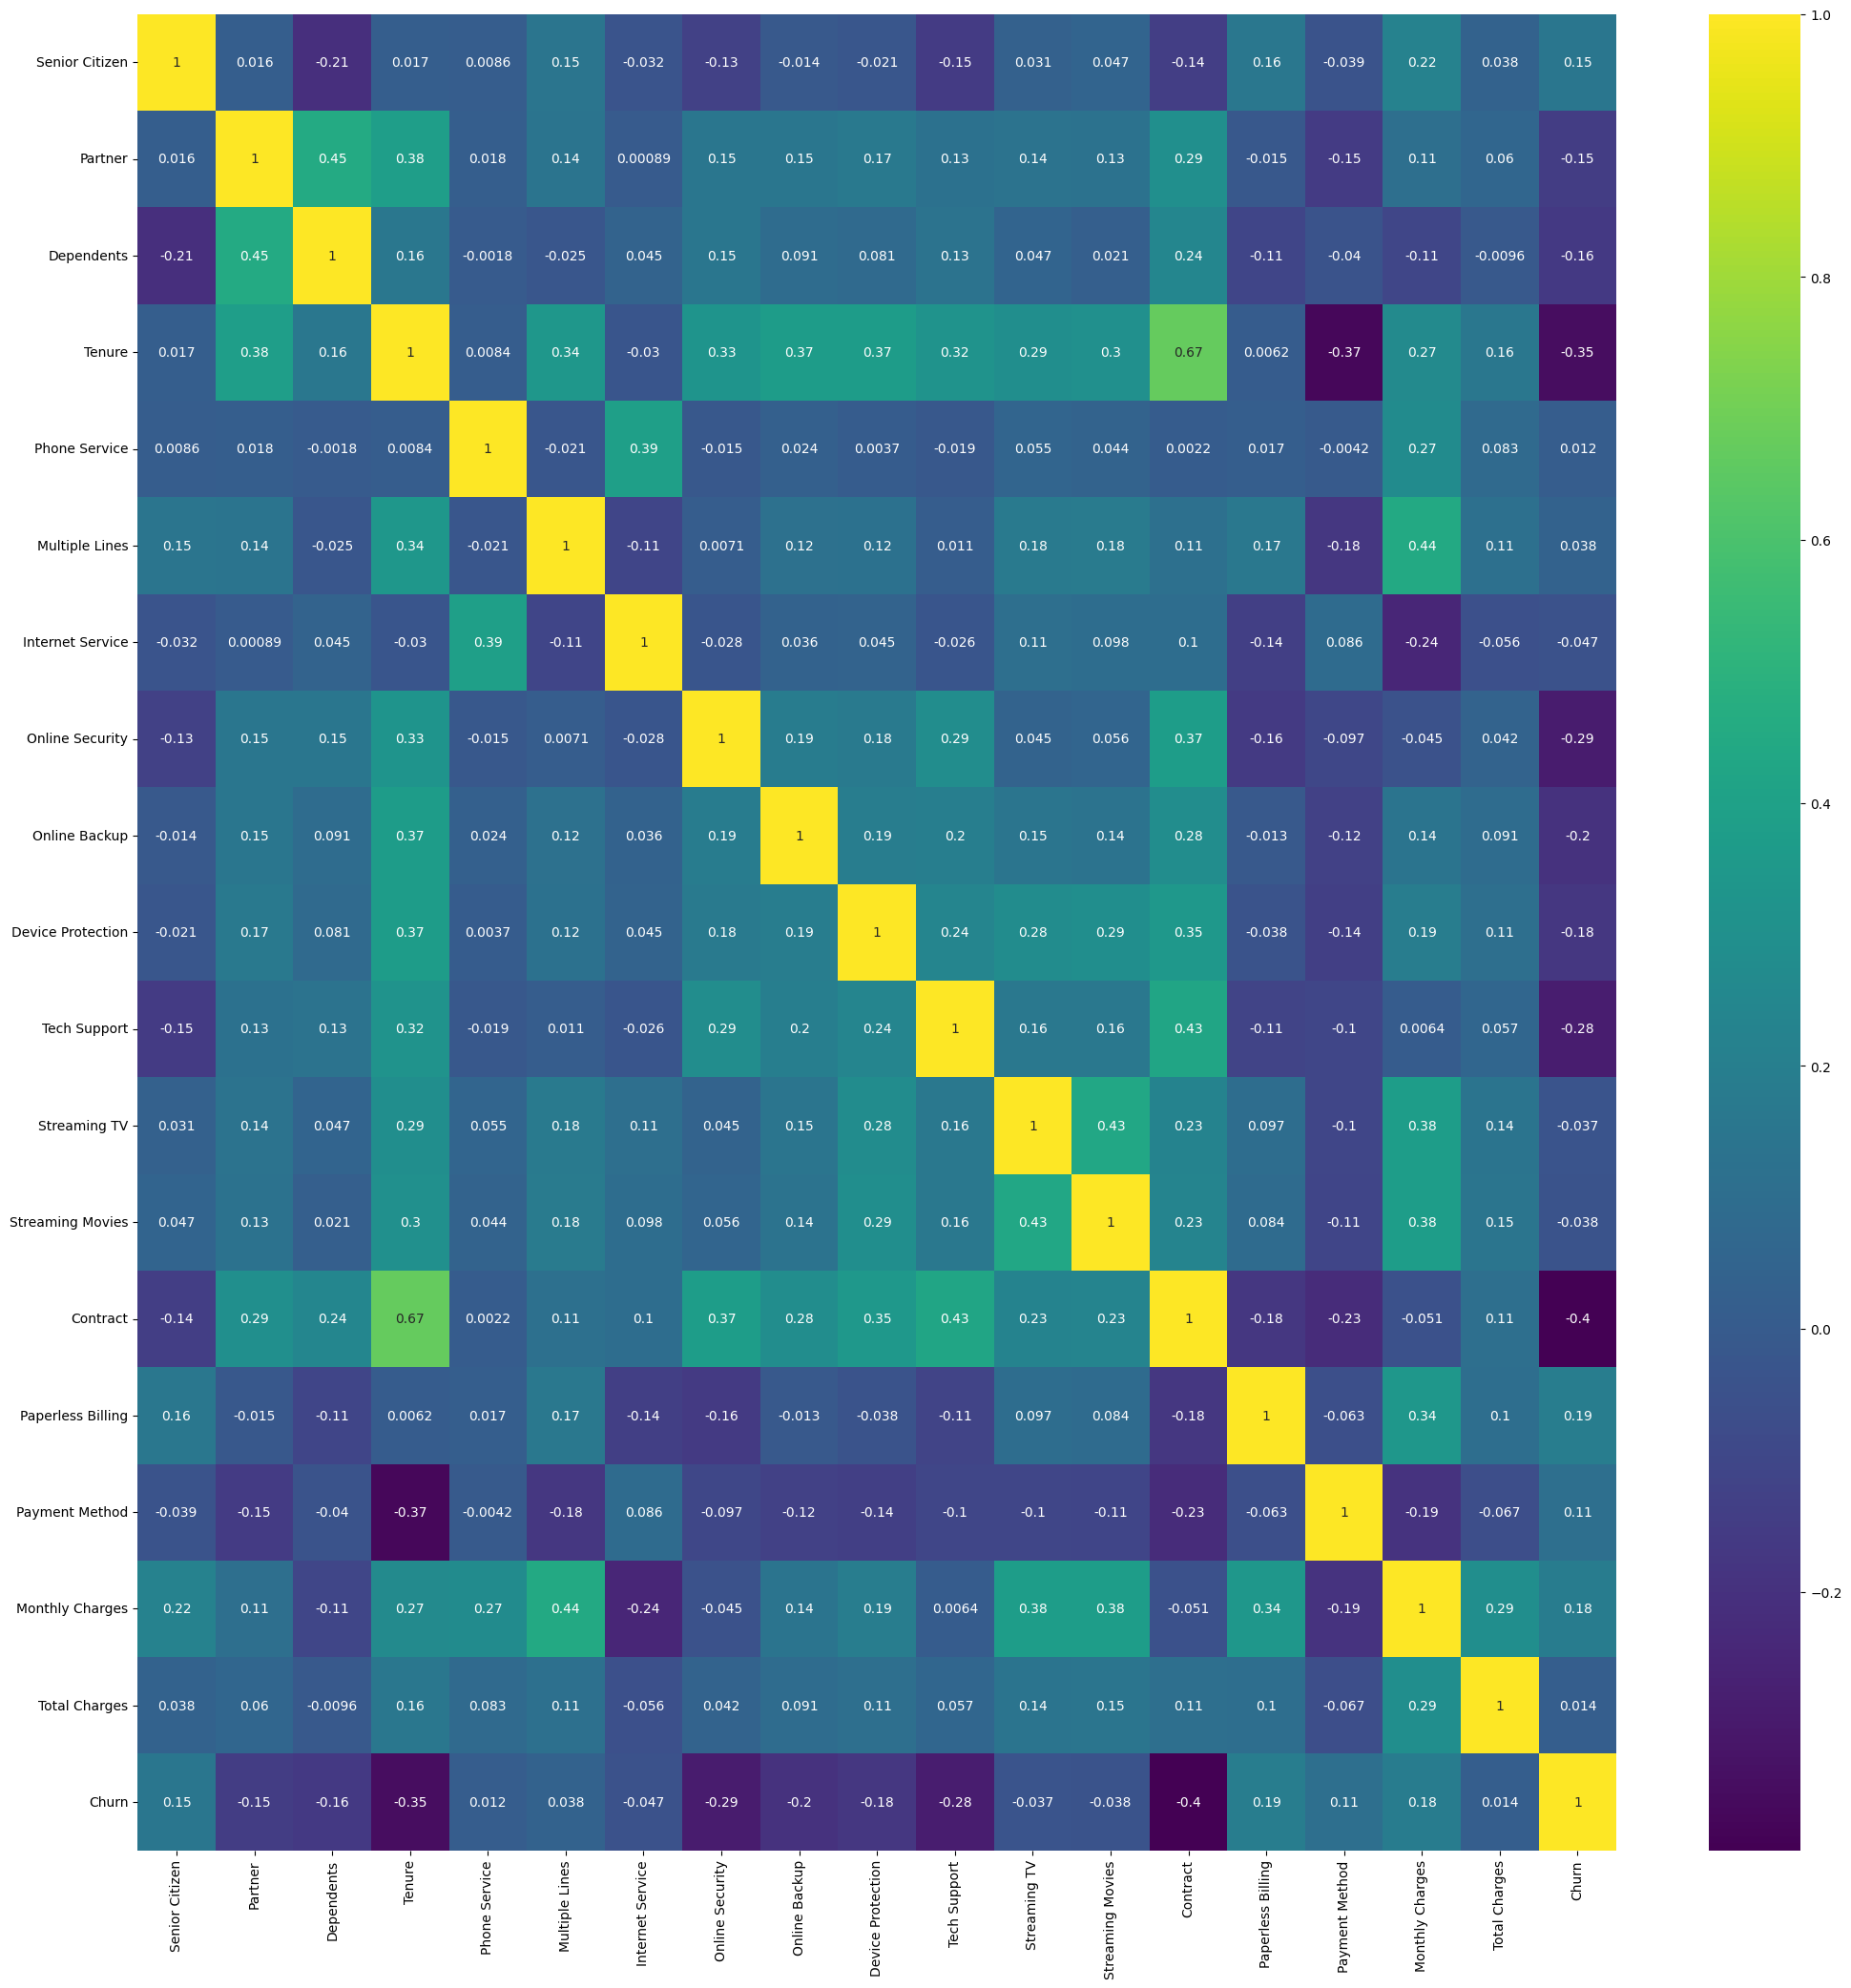

In [21]:
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', ax=ax)
plt.show()

In [22]:
# Split the data into features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Build the Sequential Neural Network
model = Sequential()


In [26]:
# Add input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

In [27]:
# Add hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.65))  # Dropout layer for regularization

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.65))


In [28]:
# Add output layer
model.add(Dense(1, activation='sigmoid'))


In [29]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [30]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
141/141 [==============================] - 6s 12ms/step - loss: 0.5548 - accuracy: 0.7071 - val_loss: 0.4315 - val_accuracy: 0.7950
Epoch 2/20
141/141 [==============================] - 1s 9ms/step - loss: 0.4866 - accuracy: 0.7586 - val_loss: 0.4220 - val_accuracy: 0.7888
Epoch 3/20
141/141 [==============================] - 1s 8ms/step - loss: 0.4694 - accuracy: 0.7755 - val_loss: 0.4173 - val_accuracy: 0.7897
Epoch 4/20
141/141 [==============================] - 1s 7ms/step - loss: 0.4585 - accuracy: 0.7817 - val_loss: 0.4199 - val_accuracy: 0.7906
Epoch 5/20
141/141 [==============================] - 1s 6ms/step - loss: 0.4525 - accuracy: 0.7861 - val_loss: 0.4140 - val_accuracy: 0.7995
Epoch 6/20
141/141 [==============================] - 1s 8ms/step - loss: 0.4448 - accuracy: 0.7892 - val_loss: 0.4110 - val_accuracy: 0.7941
Epoch 7/20
141/141 [==============================] - 1s 7ms/step - loss: 0.4421 - accuracy: 0.7903 - val_loss: 0.4105 - val_accuracy: 0.7959
Epoch

In [31]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)



45/45 [==============================] - 0s 1ms/step


In [32]:
# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

Accuracy: 0.8048261178140526

Confusion Matrix:
 [[919 117]
 [158 215]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.58      0.61       373

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



In [33]:
# Visualize training history
import matplotlib.pyplot as plt

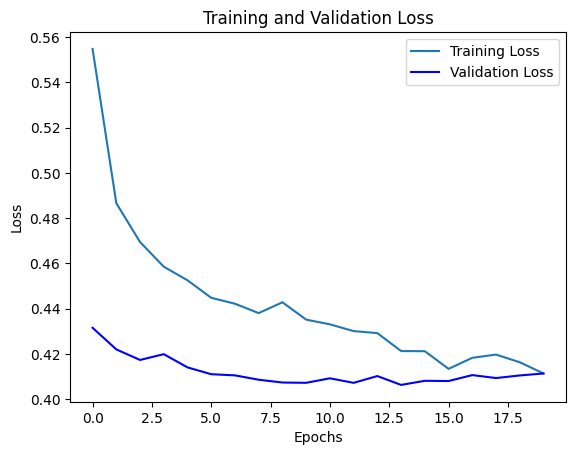

In [34]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', color='b')  # Changed color
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


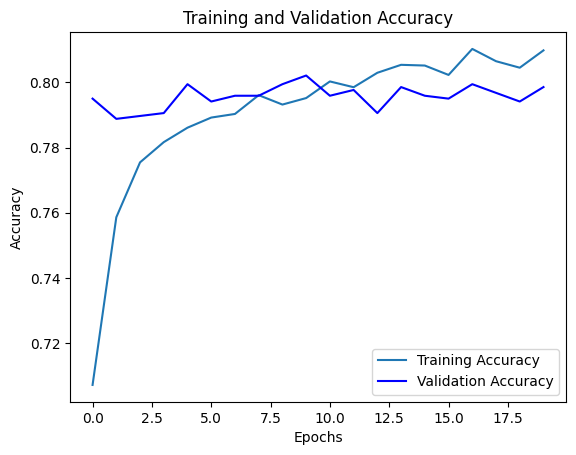

In [35]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='b')  # Changed color
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

45/45 [==============================] - 0s 1ms/step


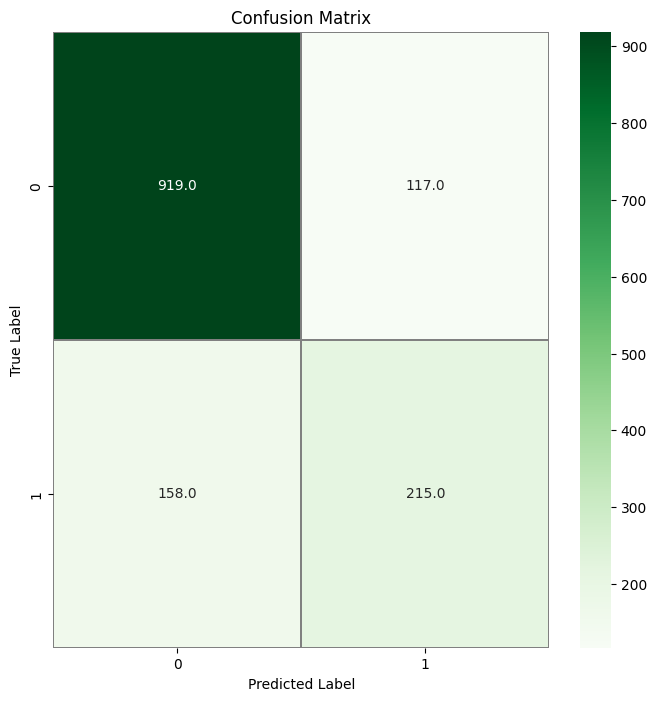

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = (Y_pred > 0.5).astype(int)
# Convert validation observations to one hot vectors
Y_true = y_test.values.astype(int)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt='.1f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()